In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch
import seaborn as sns

df = pd.read_csv("EastWestAirlines.csv")


In [40]:
df.head()

,ID,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [42]:
df.isnull().sum()

ID                   0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [45]:
# Drop ID Column
df.drop(['ID'],axis=1,inplace=True)

In [46]:
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [48]:
# Normalization function
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)



In [86]:
d1_norm = norm_func(df.iloc[:,:])
d1_norm.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.00,0.0,0.0,0.000660,0.011628,0.000000,0.000000,0.843742,0.0
1,0.011288,0.0,0.00,0.0,0.0,0.000815,0.023256,0.000000,0.000000,0.839884,0.0
2,0.024257,0.0,0.00,0.0,0.0,0.015636,0.046512,0.000000,0.000000,0.847842,0.0
3,0.008667,0.0,0.00,0.0,0.0,0.001896,0.011628,0.000000,0.000000,0.837955,0.0
4,0.057338,0.0,0.75,0.0,0.0,0.164211,0.302326,0.067398,0.075472,0.835905,1.0


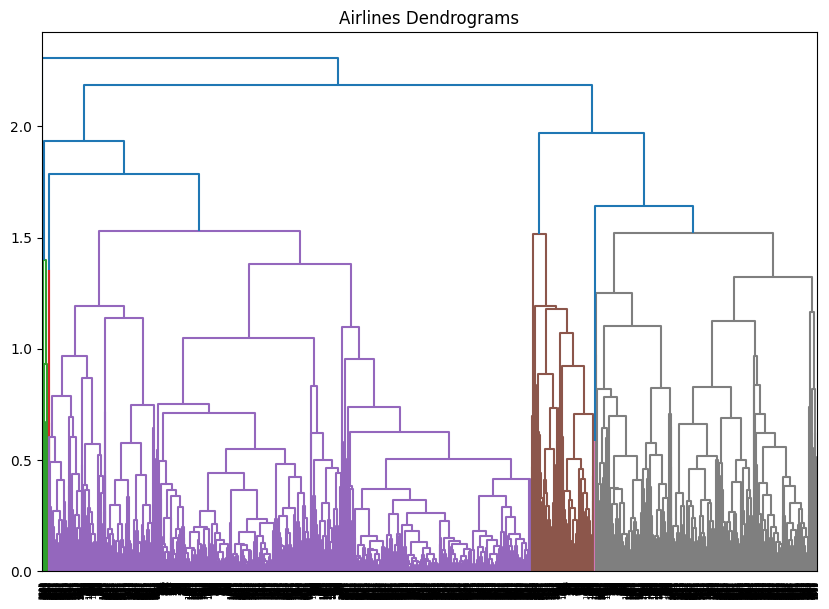

In [56]:
# See below the Dendrograms Figure
plt.figure(figsize=(10,7))
plt.title("Airlines Dendrograms")
dend = sch.dendrogram(sch.linkage(d1_norm, method='complete'))

In [52]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')
Y2 = ac.fit_predict(d1_norm)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [53]:
Y2_df = pd.DataFrame({'ac': Y2})

In [81]:
Y2_df = pd.DataFrame({'ac': Y2})
counts = Y2_df['ac'].value_counts()
counts


2    2526
0    1469
1       4
Name: ac, dtype: int64

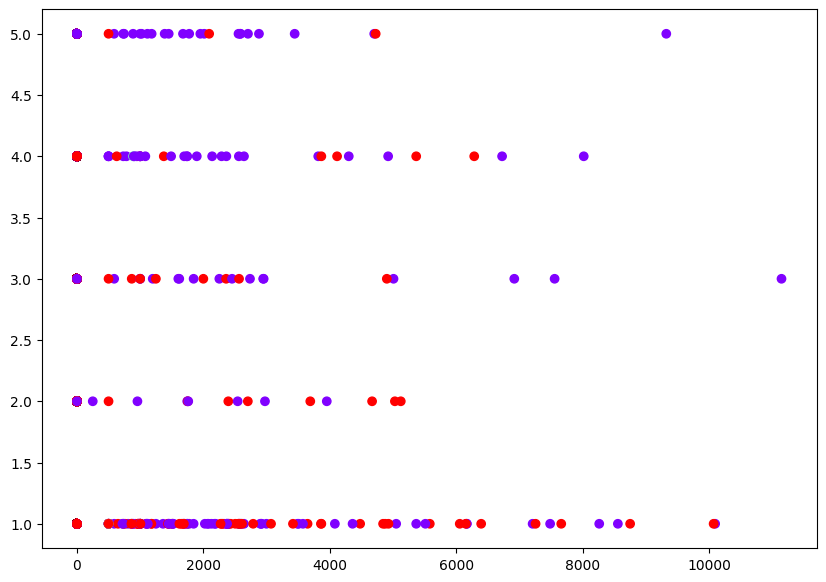

In [85]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=ac.labels_, cmap='rainbow')


In [59]:
Y = df.iloc[:,:1]
X = df.iloc[:, 1:10].values
X


array([[   0,    1,    1, ...,    0,    0, 7000],
       [   0,    1,    1, ...,    0,    0, 6968],
       [   0,    1,    1, ...,    0,    0, 7034],
       ...,
       [   0,    3,    1, ...,    0,    0, 1402],
       [   0,    1,    1, ...,  500,    1, 1401],
       [   0,    1,    1, ...,    0,    0, 1398]])

In [60]:
Y

,Balance
0,28143
1,19244
2,41354
3,14776
4,97752
...,...
3994,18476
3995,64385
3996,73597
3997,54899


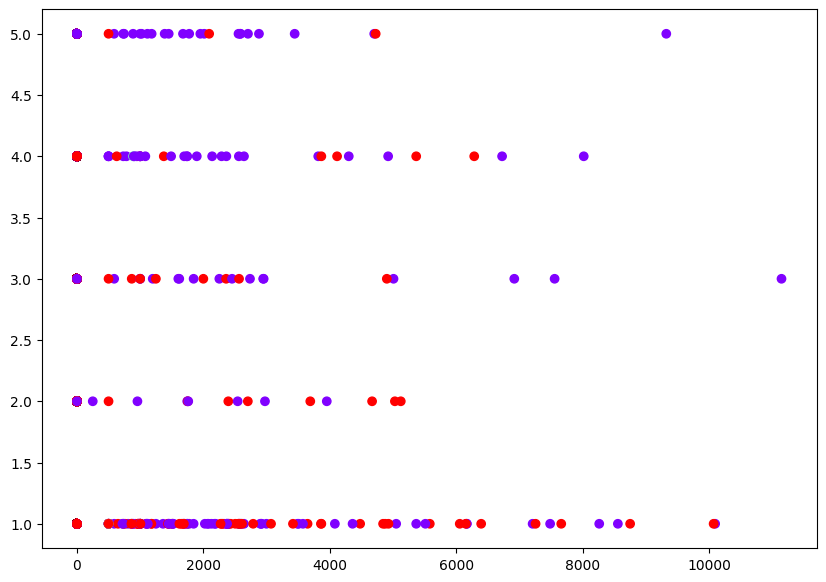

In [88]:
plt.figure(figsize=(10, 7))
plt.scatter(X[:,0], X[:,1], c=ac.labels_, cmap='rainbow')

In [91]:
##
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (12, 7)

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])


<Figure size 1200x700 with 0 Axes>

In [62]:
# Initializing KMeans
from sklearn.cluster import KMeans
KMeans()
kmeans = KMeans(n_clusters=4,n_init=20)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
Y = kmeans.predict(X)


In [63]:
Y = pd.DataFrame(Y)
Y.value_counts()


3    2582
1     932
2     422
0      63
dtype: int64

In [69]:
# K-means Cluster
kmeans.inertia_

290131183233.8941

In [70]:
cluster = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(X)
    cluster.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [71]:
cluster

[2359192923825.644,
 849399374022.4678,
 483695771962.4899,
 290132464277.6723,
 202911256969.28766,
 135949161203.66768,
 107560179138.83441,
 87002167868.90872,
 73285416820.38683,
 63881946384.53854]

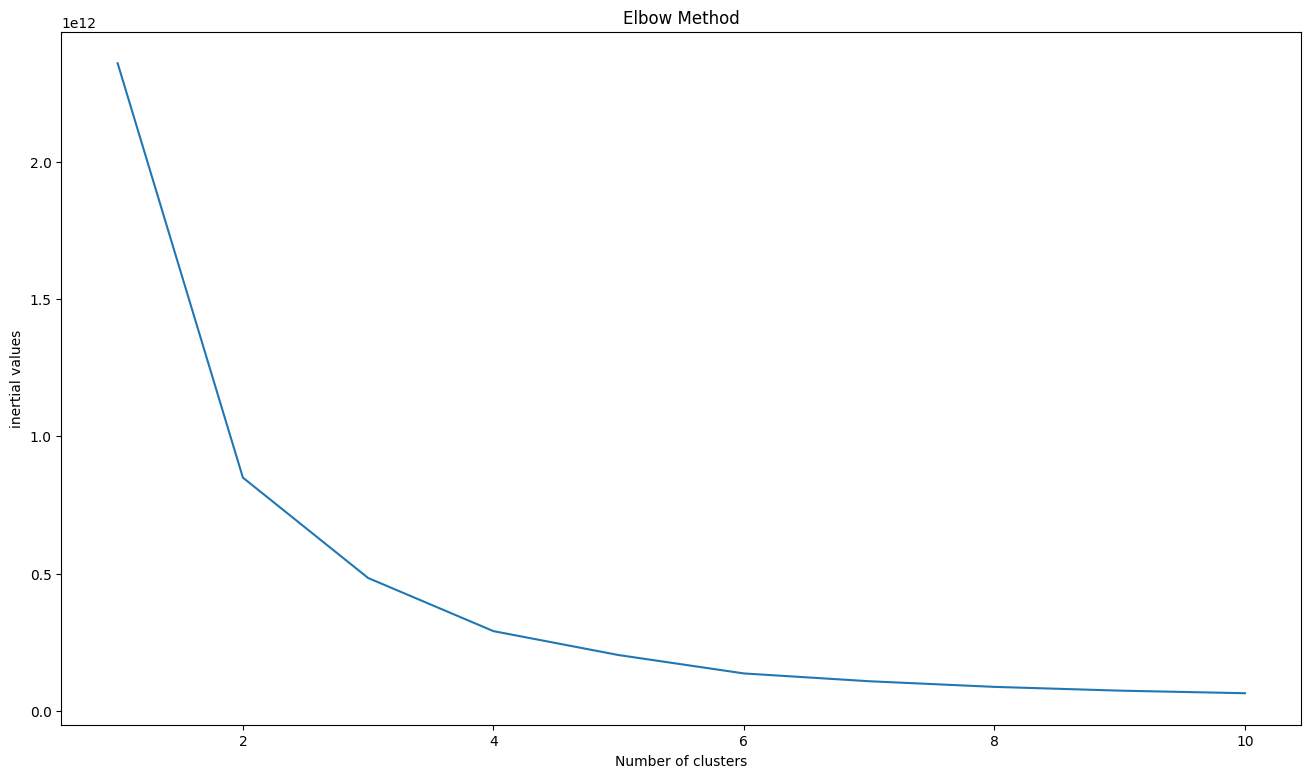

In [72]:
plt.plot(range(1, 11), cluster)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('inertial values')
plt.show()

In [92]:
# DBSCAN
df.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1


In [94]:
array = df.values
array

array([[28143,     0,     1, ...,     0,  7000,     0],
       [19244,     0,     1, ...,     0,  6968,     0],
       [41354,     0,     1, ...,     0,  7034,     0],
       ...,
       [73597,     0,     3, ...,     0,  1402,     1],
       [54899,     0,     1, ...,     1,  1401,     0],
       [ 3016,     0,     1, ...,     0,  1398,     0]])

In [96]:
for i in df.columns:
    print(i)
    print(df[i].unique())


Balance
[28143 19244 41354 ... 73597 54899  3016]
Qual_miles
[    0  2024   500   967  5031  1182  1776  1745   733  2398  1250  2706
  2998  2556  6727  1374  1952  2000  1178  7210  2015  2066  2128  2919
  1024   589  2880  3445   862  8264  1604  2975   588  1199  2586  3490
  5051  1115   810  4081  2376   948  6286  2253  2565  2643  8559  3818
  8753  9325  4301  1094  3692  1896  1000  1388  4116  2505 11148   888
 10098   745  5124  2408   867  1846  1514  8019   763  4924  1697  1739
  2370  6168   925  2288  1467  1704  2329  1099  1505  6920  2139  4481
  1448   250   783  2360  2364  2396  1362  5583  1440  5009   909  2395
  3867  1452  6057  2081  1112  2704  7663  3953  5513  2454   957  4704
  7558  2562  4727  5368  1754   651 10074  2900  1692  2600  1526  3508
   629  1651  1674  2433  1249  2543  2738  1619  6153  4361  2947  2194
   719  2611  1121  2576  4670  1761  6396  4844  2788  2178  3418  7487
  4903  1621  2092  1082  2305  3649   899  7257  4877  3071  3

In [98]:
Stscaler = StandardScaler().fit(array)
X = Stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.39545434e+00, -7.66919299e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.37995704e+00, -7.66919299e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01,  1.41192021e+00, -7.66919299e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
        -3.62167870e-01, -1.31560393e+00,  1.30391816e+00],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -9.85033311e-02, -1.31608822e+00, -7.66919299e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -3.62167870e-01, -1.31754109e+00, -7.66919299e-01]])

In [99]:

dbscan = DBSCAN(eps=1, min_samples=3)
dbscan.fit(X)

DBSCAN(eps=1, min_samples=3)

In [100]:
#Noicey data points samples are given the label
""" -1 means outliers and positive are 1,2,3 any number is clusters"""
dbscan.labels_

array([0, 0, 0, ..., 1, 0, 0])

In [101]:
C1 = pd.DataFrame(dbscan.labels_,columns=["cluster"])
C1.head(50)


,cluster
0,0
1,0
2,0
3,0
4,1
5,0
6,0
7,1
8,-1
9,1


In [102]:
#adding CLusters column with all variable
df["Clusters"] = pd.DataFrame(dbscan.labels_)


In [110]:
df

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
0,28143,0,1,1,1,174,1,0,0,7000,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,14776,0,1,1,1,500,1,0,0,6952,0,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,0


In [105]:
#shows the outliers
df[df["Clusters"] == -1]


,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
8,443003,0,3,2,1,1753,43,3850,12,6948,1,-1
21,185681,2024,1,1,1,13300,16,1800,9,6896,1,-1
22,20584,0,1,1,1,3450,11,3450,11,6884,0,-1
24,205651,500,1,1,1,4025,21,700,4,7932,0,-1
42,60313,0,1,1,1,10000,26,3250,9,7829,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
3911,55922,2273,1,1,1,8104,19,4104,16,1552,0,-1
3917,130748,0,4,1,1,65510,37,6349,7,1545,0,-1
3934,76595,0,1,1,1,10577,2,9577,1,1515,0,-1
3961,131125,862,1,1,1,4993,11,50,1,1443,0,-1


In [108]:
# Remove outlier
final_data = df[df["Clusters"] == -1]
final_data.shape

(508, 12)

In [112]:
from sklearn.cluster import KMeans

In [113]:
df2 = df.copy()


In [115]:
#Normaliztion

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df2.iloc[:,1:])


In [116]:
scaled_data


array([[-0.18629869, -0.76957841, -0.09824189, ...,  1.39545434,
        -0.7669193 , -0.24067764],
       [-0.18629869, -0.76957841, -0.09824189, ...,  1.37995704,
        -0.7669193 , -0.24067764],
       [-0.18629869, -0.76957841, -0.09824189, ...,  1.41192021,
        -0.7669193 , -0.24067764],
       ...,
       [-0.18629869,  0.68312117, -0.09824189, ..., -1.31560393,
         1.30391816,  0.88765752],
       [-0.18629869, -0.76957841, -0.09824189, ..., -1.31608822,
        -0.7669193 , -0.24067764],
       [-0.18629869, -0.76957841, -0.09824189, ..., -1.31754109,
        -0.7669193 , -0.24067764]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

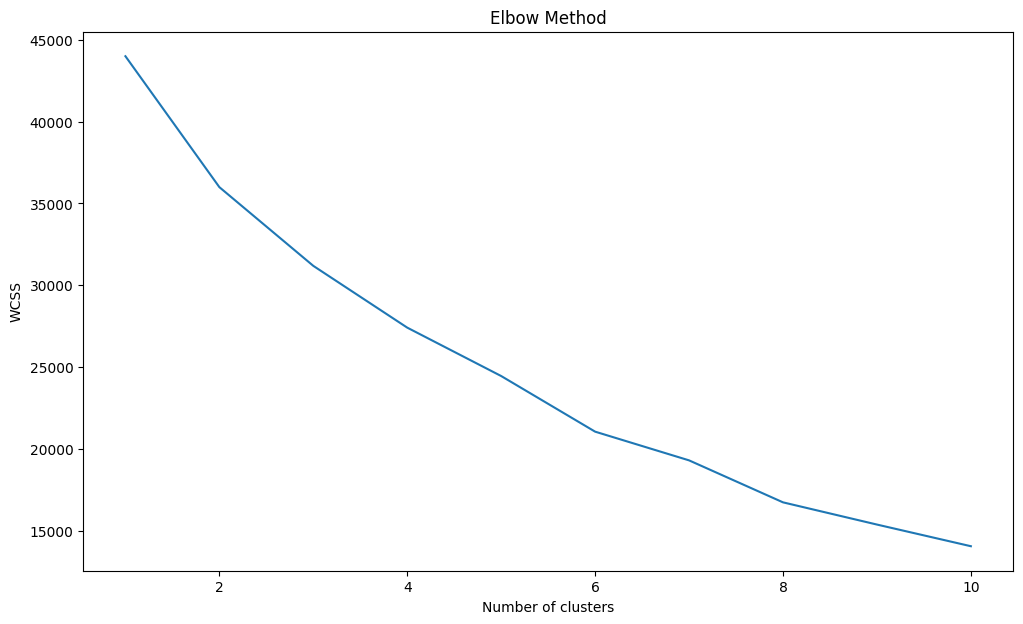

In [117]:
#finding the best K value
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_data)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [118]:
#building the Algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(5, random_state=42)
clusters_new.fit(scaled_data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

In [119]:
clusters_new.labels_

array([1, 1, 1, ..., 3, 1, 1], dtype=int32)

In [120]:
#Assigning the clusters to the data set
df2["clustersid_new"] = clusters_new.labels_

In [121]:
clusters_new.cluster_centers_

array([[ 4.10530625e-01,  1.92835061e-01, -9.82418871e-02,
         1.26493873e-03,  6.94958275e-01,  1.70897292e+00,
         3.54023111e+00,  3.79549233e+00,  2.67311706e-01,
         8.76807934e-01, -1.28438766e+00],
       [-1.36722387e-01, -5.86124843e-01, -9.82418871e-02,
        -6.07418678e-02, -5.08774347e-01, -4.83103539e-01,
        -1.82613024e-01, -1.95423498e-01, -1.86705525e-01,
        -3.60118422e-01, -2.96908881e-03],
       [ 6.15763521e+00, -2.87585353e-03, -9.82418871e-02,
        -6.27665798e-02,  1.14652066e-01,  1.18114835e-01,
         3.33404431e-01,  3.59247604e-01, -5.56280027e-02,
         5.27354113e-01, -1.36901280e+00],
       [-1.30995700e-01,  1.24035434e+00, -9.82418871e-02,
         1.34583494e-01,  9.81677081e-01,  7.65280084e-01,
        -1.10716724e-01, -1.24118981e-01,  3.65759022e-01,
         6.11904637e-01,  2.27099497e-01],
       [-1.56235600e-01, -6.68227273e-01,  9.03825361e+00,
        -6.27665798e-02, -1.01665326e-01,  6.17851143e-01,
  

In [122]:
df2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters,clustersid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,1,1
3995,64385,0,1,1,1,981,5,0,0,1395,1,1,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1,1,3
3997,54899,0,1,1,1,500,1,500,1,1401,0,0,1


In [123]:
df2.groupby('clustersid_new').agg(['mean']).reset_index()

,clustersid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,Clusters
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,177388.625000,461.687500,2.325000,1.000000,1.012500,33926.662500,28.012500,5416.500000,15.768750,4670.525000,0.793750,-0.925000
1,1,48649.175099,38.350593,1.252569,1.000000,1.000395,4858.989723,6.962846,204.391304,0.632411,3733.035573,0.196443,0.210672
2,2,115240.305556,4907.458333,2.055556,1.000000,1.000000,19913.458333,12.736111,926.833333,2.736111,4003.694444,0.625000,-1.000000
3,3,110224.556951,42.780570,3.767169,1.000000,1.038526,40850.333333,18.950586,305.048576,0.902848,4873.806533,0.665829,0.414573
4,4,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,1.046512


In [125]:
df.shape

(3999, 12)